In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import silhouette_score
import pickle

In [7]:
data = pd.read_csv(r"C:\Users\HP\Invoice extraction\cleaned_csv.csv")
data.head(10)

,Unnamed: 0,name,city,cuisine,rating,rating_count,cost,link,address
0,0,AB FOODS POINT,Abohar,"Beverages,Pizzas",3.9,11,200.0,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,1,Janta Sweet House,Abohar,"Sweets,Bakery",4.4,82,200.0,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,2,theka coffee desi,Abohar,Beverages,3.8,424,100.0,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"
3,3,Singh Hut,Abohar,"Fast Food,Indian",3.7,33,250.0,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,4,GRILL MASTERS,Abohar,"Italian-American,Fast Food",3.9,6,250.0,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
5,5,Sam Uncle,Abohar,Continental,3.6,43,200.0,https://www.swiggy.com/restaurants/sam-uncle-c...,"Sam Uncle, hanumangarh road near raja bajaj sh..."
6,6,shere punjab veg,Abohar,North Indian,4.0,336,150.0,https://www.swiggy.com/restaurants/shere-punja...,"shere punjab veg, major surinder chowk near ve..."
7,7,Shri Balaji Vaishno Dhaba,Abohar,North Indian,3.9,18,100.0,https://www.swiggy.com/restaurants/shri-balaji...,"Shri Balaji Vaishno Dhaba, St no 13,6th chowk,..."
8,8,Hinglaj Kachori Bhandhar,Abohar,"Snacks,Chaat",4.2,40,100.0,https://www.swiggy.com/restaurants/hinglaj-kac...,"Hinglaj Kachori Bhandhar, street no 11 circula..."
9,9,yummy hub,Abohar,Indian,3.9,13,200.0,https://www.swiggy.com/restaurants/yummy-hub-c...,"yummy hub, hanumangarh road near dr naveen set..."


In [8]:
data.shape

(148455, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148455 entries, 0 to 148454
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    148455 non-null  int64  
 1   name          148455 non-null  object 
 2   city          148455 non-null  object 
 3   cuisine       148455 non-null  object 
 4   rating        148455 non-null  float64
 5   rating_count  148455 non-null  int64  
 6   cost          148455 non-null  float64
 7   link          148455 non-null  object 
 8   address       148455 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 10.2+ MB


In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.isnull().sum()

Unnamed: 0      0
name            0
city            0
cuisine         0
rating          0
rating_count    0
cost            0
link            0
address         0
dtype: int64

In [12]:
data[data.name.isnull()]

,Unnamed: 0,name,city,cuisine,rating,rating_count,cost,link,address


In [13]:
data.dropna(subset=["name"],axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)
data

,Unnamed: 0,name,city,cuisine,rating,rating_count,cost,link,address
0,0,AB FOODS POINT,Abohar,"Beverages,Pizzas",3.9,11,200.0,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,1,Janta Sweet House,Abohar,"Sweets,Bakery",4.4,82,200.0,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,2,theka coffee desi,Abohar,Beverages,3.8,424,100.0,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"
3,3,Singh Hut,Abohar,"Fast Food,Indian",3.7,33,250.0,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,4,GRILL MASTERS,Abohar,"Italian-American,Fast Food",3.9,6,250.0,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
...,...,...,...,...,...,...,...,...,...
148450,148450,The Food Delight,Yavatmal,"Fast Food,Snacks",3.9,10,200.0,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga..."
148451,148451,MAITRI FOODS & BEVERAGES,Yavatmal,Pizzas,3.9,10,300.0,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY..."
148452,148452,Cafe Bella Ciao,Yavatmal,"Fast Food,Snacks",3.9,5,300.0,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S..."
148453,148453,GRILL ZILLA,Yavatmal,Continental,3.9,13,250.0,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT..."


In [14]:
df = data[["name","city","rating","rating_count","cost","cuisine","link","address"]]
df

,name,city,rating,rating_count,cost,cuisine,link,address
0,AB FOODS POINT,Abohar,3.9,11,200.0,"Beverages,Pizzas",https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,Janta Sweet House,Abohar,4.4,82,200.0,"Sweets,Bakery",https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,Abohar,3.8,424,100.0,Beverages,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"
3,Singh Hut,Abohar,3.7,33,250.0,"Fast Food,Indian",https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,GRILL MASTERS,Abohar,3.9,6,250.0,"Italian-American,Fast Food",https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
...,...,...,...,...,...,...,...,...
148450,The Food Delight,Yavatmal,3.9,10,200.0,"Fast Food,Snacks",https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga..."
148451,MAITRI FOODS & BEVERAGES,Yavatmal,3.9,10,300.0,Pizzas,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY..."
148452,Cafe Bella Ciao,Yavatmal,3.9,5,300.0,"Fast Food,Snacks",https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S..."
148453,GRILL ZILLA,Yavatmal,3.9,13,250.0,Continental,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT..."


In [15]:
# Treating Columns
# String Columns

df[["name","city","cuisine","link","address"]] = df[["name","city","cuisine","link","address"]].astype(str)

In [16]:
# Rating Column

df["rating"] = pd.to_numeric(df["rating"],errors="coerce")
df["rating"] = df["rating"].astype(float)
df.rating.fillna(df.rating.mean().round(1),inplace=True)
df.head(3)

,name,city,rating,rating_count,cost,cuisine,link,address
0,AB FOODS POINT,Abohar,3.9,11,200.0,"Beverages,Pizzas",https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,Janta Sweet House,Abohar,4.4,82,200.0,"Sweets,Bakery",https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,Abohar,3.8,424,100.0,Beverages,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"


In [18]:
# Step 1: define your ranges
rating_ranges = {
    "Too Few Ratings": (1, 20),
    "20+ ratings": (21, 50),
    "50+ ratings": (51, 100),
    "100+ ratings": (101, 500),
    "500+ ratings": (501, 1000),
    "1K+ ratings": (1001, 5000),
    "5K+ ratings": (5001, 10000),
    "10K+ ratings": (10001, 15000)
}

# Step 2: helper to map a number -> category
def get_rating_category(rating_count):
    for category, (low, high) in rating_ranges.items():
        if low <= rating_count <= high:
            return category
    return "Too Few Ratings"  # fallback

# Step 3: helper to generate random number from category range
def generate_random_rating(rating_count):
    category = get_rating_category(rating_count)
    low, high = rating_ranges[category]
    return np.random.randint(low, high + 1)

# Step 4: apply to your dataframe
df["rating_count"] = df["rating_count"].apply(generate_random_rating)


In [20]:
df["cost"] = df["cost"].astype(str).str.replace("₹ ", "", regex=False)
df["cost"] = pd.to_numeric(df["cost"], errors="coerce")
df["cost"].fillna(df["cost"].mean().round(1), inplace=True)

### These are the cuisine values that are not related
"Use Code JUMBO30 to avail","Attractive Combos Available","Code valid on bill over Rs.99","MAX 2 Combos per Order!","Use code XPRESS121 to avail.",
 "Default","8:15 To 11:30 Pm","Free Delivery ! Limited Stocks!","Discount offer from Garden Cafe Express Kankurgachi","Special Discount from (Hotel Swagath)",
 "SpecialDiscountfrom(HotelSwagath)","nan"

In [21]:
# Cuisine Column

df["cuisine"] = df["cuisine"].replace(["Use Code JUMBO30 to avail","Attractive Combos Available","Code valid on bill over Rs.99","MAX 2 Combos per Order!","Use code XPRESS121 to avail.",
 "Default","8:15 To 11:30 Pm","Free Delivery ! Limited Stocks!","Discount offer from Garden Cafe Express Kankurgachi","Special Discount from (Hotel Swagath)",
 "SpecialDiscountfrom(HotelSwagath)","nan"],"Unknown")

In [22]:
# Creating Cleaned DataFrame

cleaned_df = df.loc[:,["name","city","cuisine","rating","rating_count","cost","link","address"]]
cleaned_df.head(5)

,name,city,cuisine,rating,rating_count,cost,link,address
0,AB FOODS POINT,Abohar,"Beverages,Pizzas",3.9,3,200.0,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,Janta Sweet House,Abohar,"Sweets,Bakery",4.4,64,200.0,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,Abohar,Beverages,3.8,293,100.0,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"
3,Singh Hut,Abohar,"Fast Food,Indian",3.7,27,250.0,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,GRILL MASTERS,Abohar,"Italian-American,Fast Food",3.9,1,250.0,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."


In [23]:
# Cross-verifing null values

cleaned_df.isnull().sum()

name            0
city            0
cuisine         0
rating          0
rating_count    0
cost            0
link            0
address         0
dtype: int64

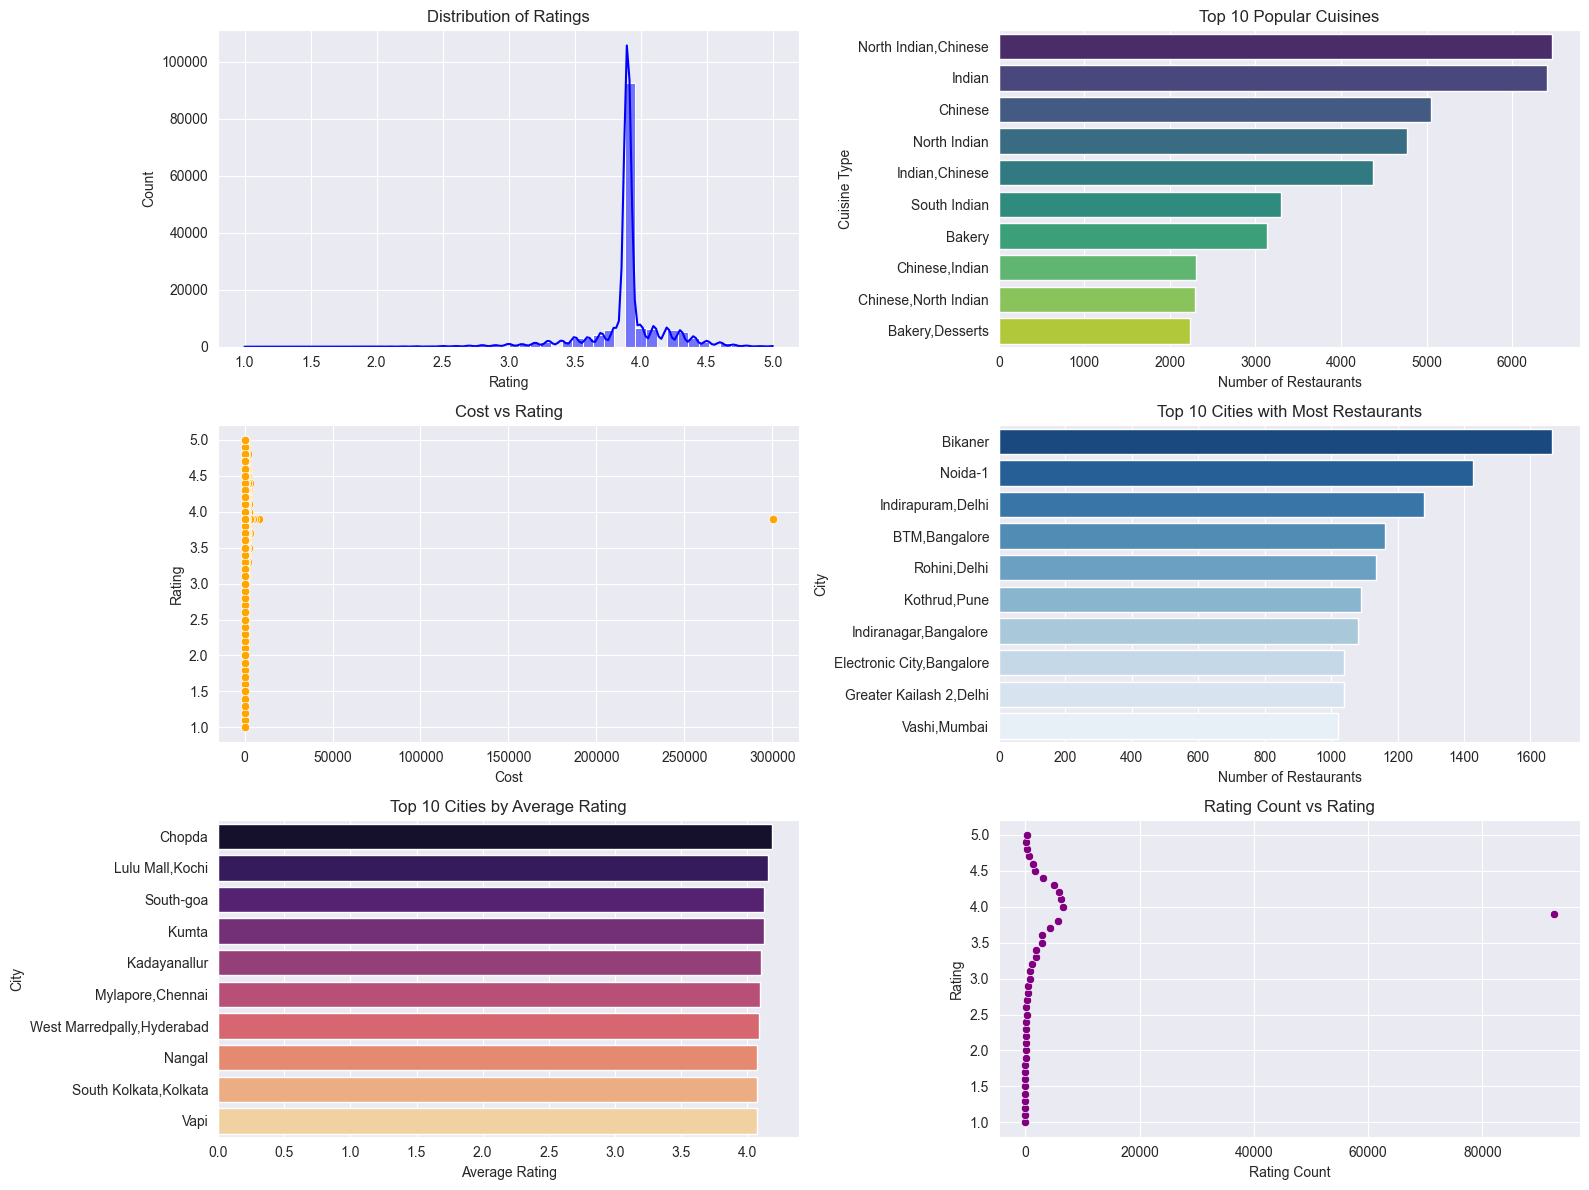

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("darkgrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

### 1. Distribution of Ratings ###
sns.histplot(cleaned_df["rating"], bins=50, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Ratings")
axes[0, 0].set_xlabel("Rating")
axes[0, 0].set_ylabel("Count")

### 2. Top 10 Popular Cuisines ###
top_cuisines = cleaned_df["cuisine"].value_counts().head(10)
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Top 10 Popular Cuisines")
axes[0, 1].set_xlabel("Number of Restaurants")
axes[0, 1].set_ylabel("Cuisine Type")

### 3. Cost vs Rating Scatter Plot ###
sns.scatterplot(x=cleaned_df["cost"], y=cleaned_df["rating"], ax=axes[1, 0], color="orange", edgecolor="w")
axes[1, 0].set_title("Cost vs Rating")
axes[1, 0].set_xlabel("Cost")
axes[1, 0].set_ylabel("Rating")

### 4. Top 10 Cities with Most Restaurants ###
top_cities = cleaned_df["city"].value_counts().head(10)
sns.barplot(y=top_cities.index, x=top_cities.values, ax=axes[1, 1], palette="Blues_r")
axes[1, 1].set_title("Top 10 Cities with Most Restaurants")
axes[1, 1].set_xlabel("Number of Restaurants")
axes[1, 1].set_ylabel("City")

### 5. Top 10 Cities by Average Rating ###
city_avg_rating = cleaned_df.groupby("city")["rating"].mean().sort_values(ascending=False).head(10)
sns.barplot(y=city_avg_rating.index, x=city_avg_rating.values, ax=axes[2, 0], palette="magma")
axes[2, 0].set_title("Top 10 Cities by Average Rating")
axes[2, 0].set_xlabel("Average Rating")
axes[2, 0].set_ylabel("City")

### 6. Rating Count vs Rating ###
rating_count = cleaned_df.groupby("rating")["rating"].count()
sns.scatterplot(x=rating_count.values, y=rating_count.index, ax=axes[2, 1], color="purple")
axes[2, 1].set_title("Rating Count vs Rating")
axes[2, 1].set_xlabel("Rating Count")
axes[2, 1].set_ylabel("Rating")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [44]:
# Creating Cleaned_df CSV file

cleaned_df.to_csv(r"C:\Users\HP\Invoice extraction\cleaned_csv1.csv")

In [27]:
# Initialize Categorical Encoders

city_encoder = OneHotEncoder(sparse_output=False)
name_encoder = LabelEncoder()
cuisine_encoder = LabelEncoder()

# Standardize numerical features

rating_scaler = StandardScaler()
cost_scaler = StandardScaler()

In [28]:
# One-Hot Encoding for city

city_encoded = city_encoder.fit_transform(cleaned_df[["city"]])
city_encoded_df = pd.DataFrame(city_encoded, columns=city_encoder.get_feature_names_out(["city"])) # Convert to DataFrames

# Label Encoding for name and cuisine

cleaned_df["name_encoded"] = name_encoder.fit_transform(cleaned_df["name"])
cleaned_df["cuisine_encoded"] = cuisine_encoder.fit_transform(cleaned_df["cuisine"])

# Apply StandardScaler separately

cleaned_df["rating_scaled"] = rating_scaler.fit_transform(cleaned_df[["rating"]])
cleaned_df["cost_scaled"] = cost_scaler.fit_transform(cleaned_df[["cost"]])

In [29]:
# Combine all encoded and scaled features

encoded_data = pd.concat([
    cleaned_df.drop(["city", "name", "cuisine", "rating", "cost","link","address","rating_count"], axis=1),
    city_encoded_df
], axis=1)

In [ ]:
# Save the encoded dataset as CSV file

encoded_data.to_csv(r"C:\Users\HP\Invoice extraction\cleaned_csv2.csv", index=True)

In [33]:
# Save the encoders and scaler as a pickle file

with open(r"C:\Users\HP\Invoice extraction\encoder.pkl", "wb") as f:
    pickle.dump({
        "city_encoder": city_encoder,
        "name_encoder": name_encoder,
        "cuisine_encoder": cuisine_encoder,
        "rating_scaler": rating_scaler,
        "cost_scaler": cost_scaler
    }, f)

In [34]:
# Input Features

X = encoded_data.drop(columns=["name_encoded"], errors="ignore")

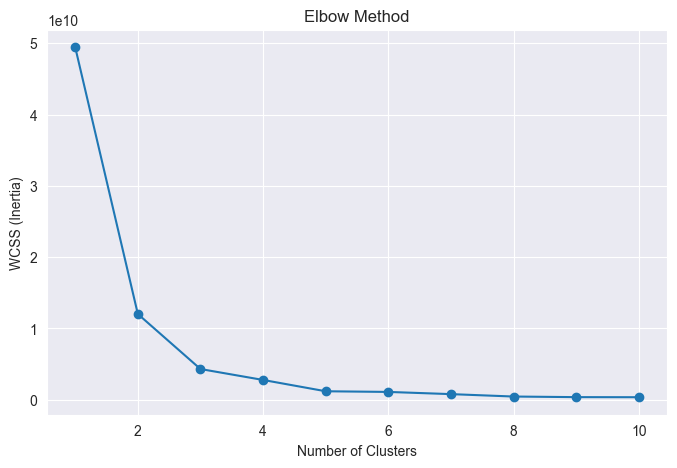

In [39]:
# Visualize the optimal number of clusters using Elbow Method

wcss = []
for i in range(1,11):
    kmeans_temp = KMeans(n_clusters=i, random_state=42)
    kmeans_temp.fit(X)
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [40]:
# Model and Training

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [41]:
# Save the KMeans model

with open(r"C:\Users\HP\Invoice extraction\\kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [42]:
# Metrics - Silhouette Score

y_pred = kmeans.labels_

sil_score = silhouette_score(X, y_pred)
print(f"Silhouette Score : {sil_score:.4f}")

Silhouette Score : 0.6963


A Silhouette Score of 0.6963 indicates that your K-Means clustering model is performing well with a good balance between cohesion (how close data points are within the same cluster) and separation (how far clusters are from each other).